# Resolução exercício aula 04

In [0]:
import os

def restart_runtime():
  os.kill(os.getpid(), 9)

## Fabricação de produto 1 e produto 2

In [0]:
import random
import numpy
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

### Instalação e carregamento das bibliotecas de GA em python

In [0]:
!pip install deap

### Declaração das funções auxiliares que devem conter as informações do problema

In [0]:
# Função Objetivo -> Repare que o único parametro que a função deve receber é um individuo
def LucroFabrica(individual):
    return (individual[0]*3000)+(individual[1]*5000)

In [0]:
# Função de restrição que o problema tiver (nem todos os problemas contém restrições)
def FuncaoDeRestricao(v1, v2):
  totalSector1IsValid = v1*1 <= 4
  totalSector2IsValid = v2*2 <= 12
  totalSector3IsValid = ((v1*3) + (v2*2)) <= 18
  if totalSector1IsValid and totalSector2IsValid and totalSector3IsValid:
    return True
  return False

In [0]:
# Função utilizada para gerar os individuos -> Repare que não há nenhum mistério, os valores v1 e v2 utilizam a função que é passada por parâmetro que por sua vez
# é uma função que gera numeros aleatorios inteiros entre 0 e 50, como está declarado mais abaixo
# outro ponto importante é como fazer a declaração do cromossomo, procure sempre utilizar tal forma como está decrito, para cada valor, adicionar (append) o mesmo ao cromossomo
# GeradorDeIndividuos(ClasseDoIndividuo, FunçãoDeGeraçãoDeNºAleatorio):
def GeradorDeIndividuos(icls, attr_bool_function):
  i = 0
  cromossomo = list()
  while True: 
    v1 = attr_bool_function()
    v2 = attr_bool_function()
    if FuncaoDeRestricao(v1, v2):
      break
    i = i + 1
  cromossomo.append(v1)
  cromossomo.append(v2)
  return icls(cromossomo)

### Declaração dos pacotes referentes a biblioteca do GA: 
#### Nomenclatura referente a biblioteca e deve-se alterar somente os pesos das funções que deverão ser, ou maximizada ou minimizada
#### Pode-se alterar também o tipo da variavel do Individuo. Mas que, geralmente, é uma lista de numeros inteiros

In [0]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [0]:
toolbox = base.Toolbox()
# Definir o gerador de numeros aleatórios de numeros inteiros entre o intervalo (0 e 50)
toolbox.register("attr_bool", random.randint, 0, 50)
# Inicialização do cromossomo (quantos genes o cromossomo deve possuir)
#toolbox.register("individualCreator", GeradorDeIndividuos, toolbox.attr_bool)
toolbox.register("individual", GeradorDeIndividuos, creator.Individual, toolbox.attr_bool)
#toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 2)
# Registro do individuo na população
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Registro do nome da função objetivo
toolbox.register("evaluate", LucroFabrica)
# Registro de qual o tipo de cruzamento deve ser utilizado (cruzamento de 2 pontos)
toolbox.register("mate", tools.cxTwoPoint)
# Registro de qual tipo de mutação deve ser utilizado (probabilidade de um individuo sofrer mutação)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
# Registro de qual o tipo do método de seleção que será utilizado
toolbox.register("select", tools.selTournament, tournsize=3)

In [0]:
# definição da população inicial
population = toolbox.population(n=15)
# quantidade de gerações
NGEN=25

bestIndEachGeneration = []
for gen in range(NGEN):
  print("Geracao: ", gen)
  offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
  fits = list(toolbox.map(toolbox.evaluate, offspring))
  for fit, ind in zip(fits, offspring):
    ind.fitness.wvalues = fit
  population = toolbox.select(offspring, k=len(population))
  bestIndEachGeneration.append(max(fits))
  print("Melhor Avaliação: ", max(fits), "\n")
top10 = tools.selBest(population, k=10)
top10

[[4, 6],
 [4, 6],
 [4, 6],
 [4, 6],
 [4, 6],
 [4, 6],
 [4, 6],
 [4, 6],
 [4, 6],
 [4, 6]]

## Chamada efetiva do GA para resolução

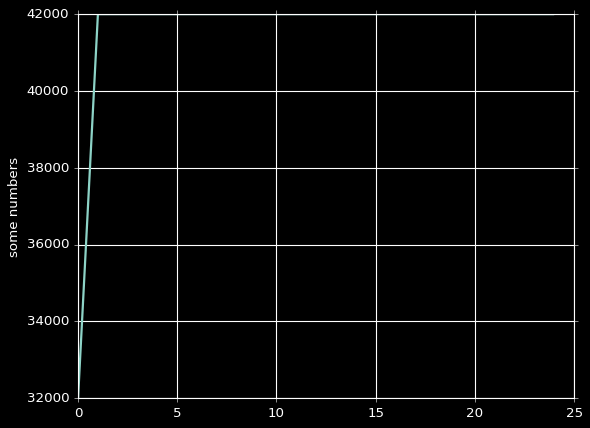

In [0]:
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
plt.plot(bestIndEachGeneration)
plt.ylabel('Maior valor da função de aptidão')
plt.show()